In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import scipy as sp

In [88]:
# read and format data
range_data = np.genfromtxt('range_data.csv', delimiter=',')
normalization_ratio = 255 / np.amax(range_data)
range_data = np.array((range_data*normalization_ratio).astype(np.uint8))

# find 
edges = cv.Canny(range_data, 10, 200)
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
ellipses = [cv.fitEllipse(contours[elps]) for elps in range(np.shape(contours)[0])]

# get ellipse characterising disc
ellipse_size = [(ellipses[elps][1][0]*ellipses[elps][1][1]) for elps in range(np.shape(contours)[0])]
index = np.argmin(ellipse_size)

disc_ellipse = ellipses[index]
center = np.rint(disc_ellipse[0]).astype(np.int16)
size = disc_ellipse[1]
rotation = disc_ellipse[2] / 180 * np.pi

# calculate points to measure tilt axis from
# order clockwise
c, s = np.cos(rotation), np.sin(rotation)
R = np.array(((c, -s), (s, c)))

ratio_from_disc_center = 4
reach_pts = [ [size[0]/ratio_from_disc_center,0 ], 
              [0,-size[1]/ratio_from_disc_center],
              [-size[0]/ratio_from_disc_center,0],
              [0,size[1]/ratio_from_disc_center ] ]
reach_pts = [ tuple(center + np.rint(R @ reach_pts[pt]).astype(np.int16)) for pt in range(4) ]


# read disc distance from range_data
distance = range_data[center]
reach_dist = [ range_data[reach_pts[pt]] for pt in range(4) ]
print(reach_dist)

# front distances, calculate the pitch and yaw of the disc
angle_1 = np.arcsin(reach_dist[0] - reach_dist[2])
angle_2 = np.arcsin(reach_dist[1] - reach_dist[3])
print(angle_1)
print(angle_2)


[3, 3, 3, 3]
0.0
0.0


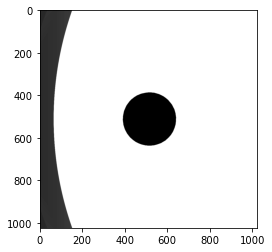

In [6]:
plt.imshow(range_data, cmap='gray')

In [4]:
sample_rate = 25
data = range_data[::sample_rate,::sample_rate]

threshold = 50


data[data > threshold] = threshold
plt.imshow(data, cmap='gray')
print(np.size(data))

SyntaxError: invalid syntax (<ipython-input-4-cf1b216e1808>, line 5)